In [10]:
import requests
import pandas as pd 
from bs4 import BeautifulSoup
import string
import spacy
import re



Scrap Data

In [14]:
url="""https://insights.blackcoffer.com/man-and-machines-together-machines-are-more-diligent-than-humans-blackcoffe/"""

In [15]:
headers = {"User-Agent": "Mozilla/5.0 (X11; Linux x86_64; rv:60.0) Gecko/20100101 Firefox/60.0"}
page = requests.get(url, headers=headers)
soup = BeautifulSoup(page.content, 'html.parser')

Extract Title from articel

In [16]:
title=soup.find('h1',class_="entry-title")
title=title.text.replace('\n'," ")
title

'Will machine replace the human in the future of work?'

Extract Content from articel

In [17]:
content=soup.findAll(attrs={'class':'td-post-content'})
content=content[0].text.replace('\n'," ")
content

' Introduction Where is this disruptive technology taking us? Take it or leave it, disruptive technology always creates new jobs much more than depleted jobs. You might notice certain jobs disappearing but those jobs are the jobs that transform humans to robots, to machines, and the technology is creating machines to replace them.\xa0 Technology creates the data analysis tools to manipulate and create custom scenarios using artificial intelligence (AI), Big Data and Machine Learning (ML) algorithms to predict and drive consumer behavior. Data Analytics tools, such as Google Analytics , and others are available today for free, and, if used correctly, can help organizations save millions, maybe billions of dollars of sales and marketing.  How machine will replace humans? Before I go on, I think it’s best to level set on what constitutes\xa0machines.\xa0In the context of this article , machines describe computers and computerized equipment, like robots, that have been programmed to learn,

Remove punctuation from the content

In [18]:
#Punctuation
content = content.translate(str.maketrans('', '', string.punctuation)) 
content

' Introduction Where is this disruptive technology taking us Take it or leave it disruptive technology always creates new jobs much more than depleted jobs You might notice certain jobs disappearing but those jobs are the jobs that transform humans to robots to machines and the technology is creating machines to replace them\xa0 Technology creates the data analysis tools to manipulate and create custom scenarios using artificial intelligence AI Big Data and Machine Learning ML algorithms to predict and drive consumer behavior Data Analytics tools such as Google Analytics  and others are available today for free and if used correctly can help organizations save millions maybe billions of dollars of sales and marketing  How machine will replace humans Before I go on I think it’s best to level set on what constitutes\xa0machines\xa0In the context of this article  machines describe computers and computerized equipment like robots that have been programmed to learn sometimes like humans Occ

convert into Tokens

In [20]:
#Tokenization
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize
text_tokens = word_tokenize(content)
print(text_tokens[0:50])

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


['Introduction', 'Where', 'is', 'this', 'disruptive', 'technology', 'taking', 'us', 'Take', 'it', 'or', 'leave', 'it', 'disruptive', 'technology', 'always', 'creates', 'new', 'jobs', 'much', 'more', 'than', 'depleted', 'jobs', 'You', 'might', 'notice', 'certain', 'jobs', 'disappearing', 'but', 'those', 'jobs', 'are', 'the', 'jobs', 'that', 'transform', 'humans', 'to', 'robots', 'to', 'machines', 'and', 'the', 'technology', 'is', 'creating', 'machines', 'to']


lenghts of tokens before removing stopwords

In [21]:
len(text_tokens)

1328

Remove stopwords from the tokens

In [22]:
#Remove stopwords
import nltk
from nltk.corpus import stopwords
nltk.download('punkt')
nltk.download('stopwords')

my_stop_words = stopwords.words('english')
my_stop_words.append('the')
no_stop_tokens = [word for word in text_tokens if not word in my_stop_words]
print(no_stop_tokens[0:40])

['Introduction', 'Where', 'disruptive', 'technology', 'taking', 'us', 'Take', 'leave', 'disruptive', 'technology', 'always', 'creates', 'new', 'jobs', 'much', 'depleted', 'jobs', 'You', 'might', 'notice', 'certain', 'jobs', 'disappearing', 'jobs', 'jobs', 'transform', 'humans', 'robots', 'machines', 'technology', 'creating', 'machines', 'replace', 'Technology', 'creates', 'data', 'analysis', 'tools', 'manipulate', 'create']


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


lenghts of tokens after removing stopwords

In [23]:
len(no_stop_tokens)

763

Check for positive words

In [29]:
with open("positive-words.txt","r") as pos:
    poswords = pos.read().split("\n")  
    poswords = poswords[5:]

In [30]:
pos_count = " ".join ([w for w in no_stop_tokens if w in poswords])
pos_count=pos_count.split(" ")

Positive Score

In [31]:
Positive_score=len(pos_count)
print(Positive_score)

53


Check for negative words

In [35]:
with open("negative-words.txt","r",encoding = "ISO-8859-1") as neg:
    negwords = neg.read().split("\n")
    
negwords = negwords[36:]

In [36]:
neg_count = " ".join ([w for w in no_stop_tokens if w in negwords])
neg_count=neg_count.split(" ")

Negative score

In [37]:
Negative_score=len(neg_count)
print(Negative_score)

24


In [38]:
filter_content = ' '.join(no_stop_tokens)

In [39]:
data=[[url,title,content,filter_content,Positive_score,Negative_score]]

In [40]:
data=pd.DataFrame(data,columns=["url","title","content","filter_content","Positive_Score","Negative_Score"])

calculate Polarity Score & Subjectivity Score

In [41]:
from textblob import TextBlob

# Get The Subjectivity
def sentiment_analysis(data):
    sentiment = TextBlob(data["content"]).sentiment
    return pd.Series([sentiment.polarity,sentiment.subjectivity ])

# Adding Subjectivity & Polarity
data[["polarity", "subjectivity"]] = data.apply(sentiment_analysis, axis=1)

data

,url,title,content,filter_content,Positive_Score,Negative_Score,polarity,subjectivity
0,https://insights.blackcoffer.com/man-and-machi...,Will machine replace the human in the future o...,Introduction Where is this disruptive technol...,Introduction Where disruptive technology takin...,53,24,0.121082,0.453334


Average sentence length

In [42]:
#AVG SENTENCE LENGTH
AVG_SENTENCE_LENGTH = len(content.replace(' ',''))/len(re.split(r'[?!.]', content))
print('Word average =', AVG_SENTENCE_LENGTH)

Word average = 6542.0


In [46]:
!apt update
!apt-get install libasound2-dev

Hit:1 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu focal InRelease
Get:2 http://security.ubuntu.com/ubuntu focal-security InRelease [114 kB]
Hit:3 http://ppa.launchpad.net/cran/libgit2/ubuntu focal InRelease
Hit:4 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu focal InRelease
Get:5 https://cloud.r-project.org/bin/linux/ubuntu focal-cran40/ InRelease [3,622 B]
Hit:6 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2004/x86_64  InRelease
Hit:7 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu focal InRelease
Hit:8 http://ppa.launchpad.net/ubuntugis/ppa/ubuntu focal InRelease
Hit:9 http://archive.ubuntu.com/ubuntu focal InRelease
Get:10 http://archive.ubuntu.com/ubuntu focal-updates InRelease [114 kB]
Get:11 http://security.ubuntu.com/ubuntu focal-security/universe amd64 Packages [1,045 kB]
Get:12 http://security.ubuntu.com/ubuntu focal-security/main amd64 Packages [2,674 kB]
Get:13 http://archive.ubuntu.com/ubuntu focal-backports InRelease [108 kB]
Get:14 http://

In [49]:
pip install textract

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.0/69.0 kB 7.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.4/133.4 kB 11.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.1/10.1 MB 62.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.9/106.9 kB 11.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 103.3/103.3 kB 12.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 32.8/32.8 MB 25.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 75.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 58.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.2/112.2 kB 12.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 128.5/128.

In [51]:
AVG_NUMBER_OF_WORDS_PER_SENTENCE = [len(l.split()) for l in re.split(r'[?!.]', content) if l.strip()]
AVG_NUMBER_OF_WORDS_PER_SENTENCE=print(sum(AVG_NUMBER_OF_WORDS_PER_SENTENCE)/len(AVG_NUMBER_OF_WORDS_PER_SENTENCE))

1293.0


COMPLEX WORD COUNT

In [52]:
def syllable_count(word):
    count = 0
    vowels = "AEIOUYaeiouy"
    if word[0] in vowels:
        count += 1
    for index in range(1, len(word)): 
        if word[index] in vowels and word[index - 1] not in vowels:
            count += 1
            if word.endswith("es"or "ed"):
                count -= 1
    if count == 0:
        count += 1
    return count



COMPLEX_WORDS=syllable_count(content)
print(COMPLEX_WORDS)

2310


Word Count

In [53]:
Word_Count=len(content)
print(Word_Count)

7845


Percentage of Complex words

In [54]:
pcw=(COMPLEX_WORDS/Word_Count)*100
print(pcw)

29.44550669216061


Average Word Length

In [56]:
Average_Word_Length=len(content.replace(' ',''))/len(content.split())
print(Average_Word_Length)

5.059551430781129


SYLLABLE PER WORD

In [57]:
word=content.replace(' ','')
syllable_count=0
for w in word:
      if(w=='a' or w=='e' or w=='i' or w=='o' or w=='y' or w=='u' or w=='A' or w=='E' or w=='I' or w=='O' or w=='U' or w=='Y'):
            syllable_count=syllable_count+1
print("The AVG number of syllables in the word is: ")
print(syllable_count/len(content.split()))

The AVG number of syllables in the word is: 
2.0239752513534417


For WordCloud


In [58]:
# Import packages
import matplotlib.pyplot as plt
%matplotlib inline
from wordcloud import WordCloud, STOPWORDS
# Define a function to plot word cloud
def plot_cloud(wordcloud):
    # Set figure size
    plt.figure(figsize=(40, 30))
    # Display image
    plt.imshow(wordcloud) 
    # No axis details
    plt.axis("off");

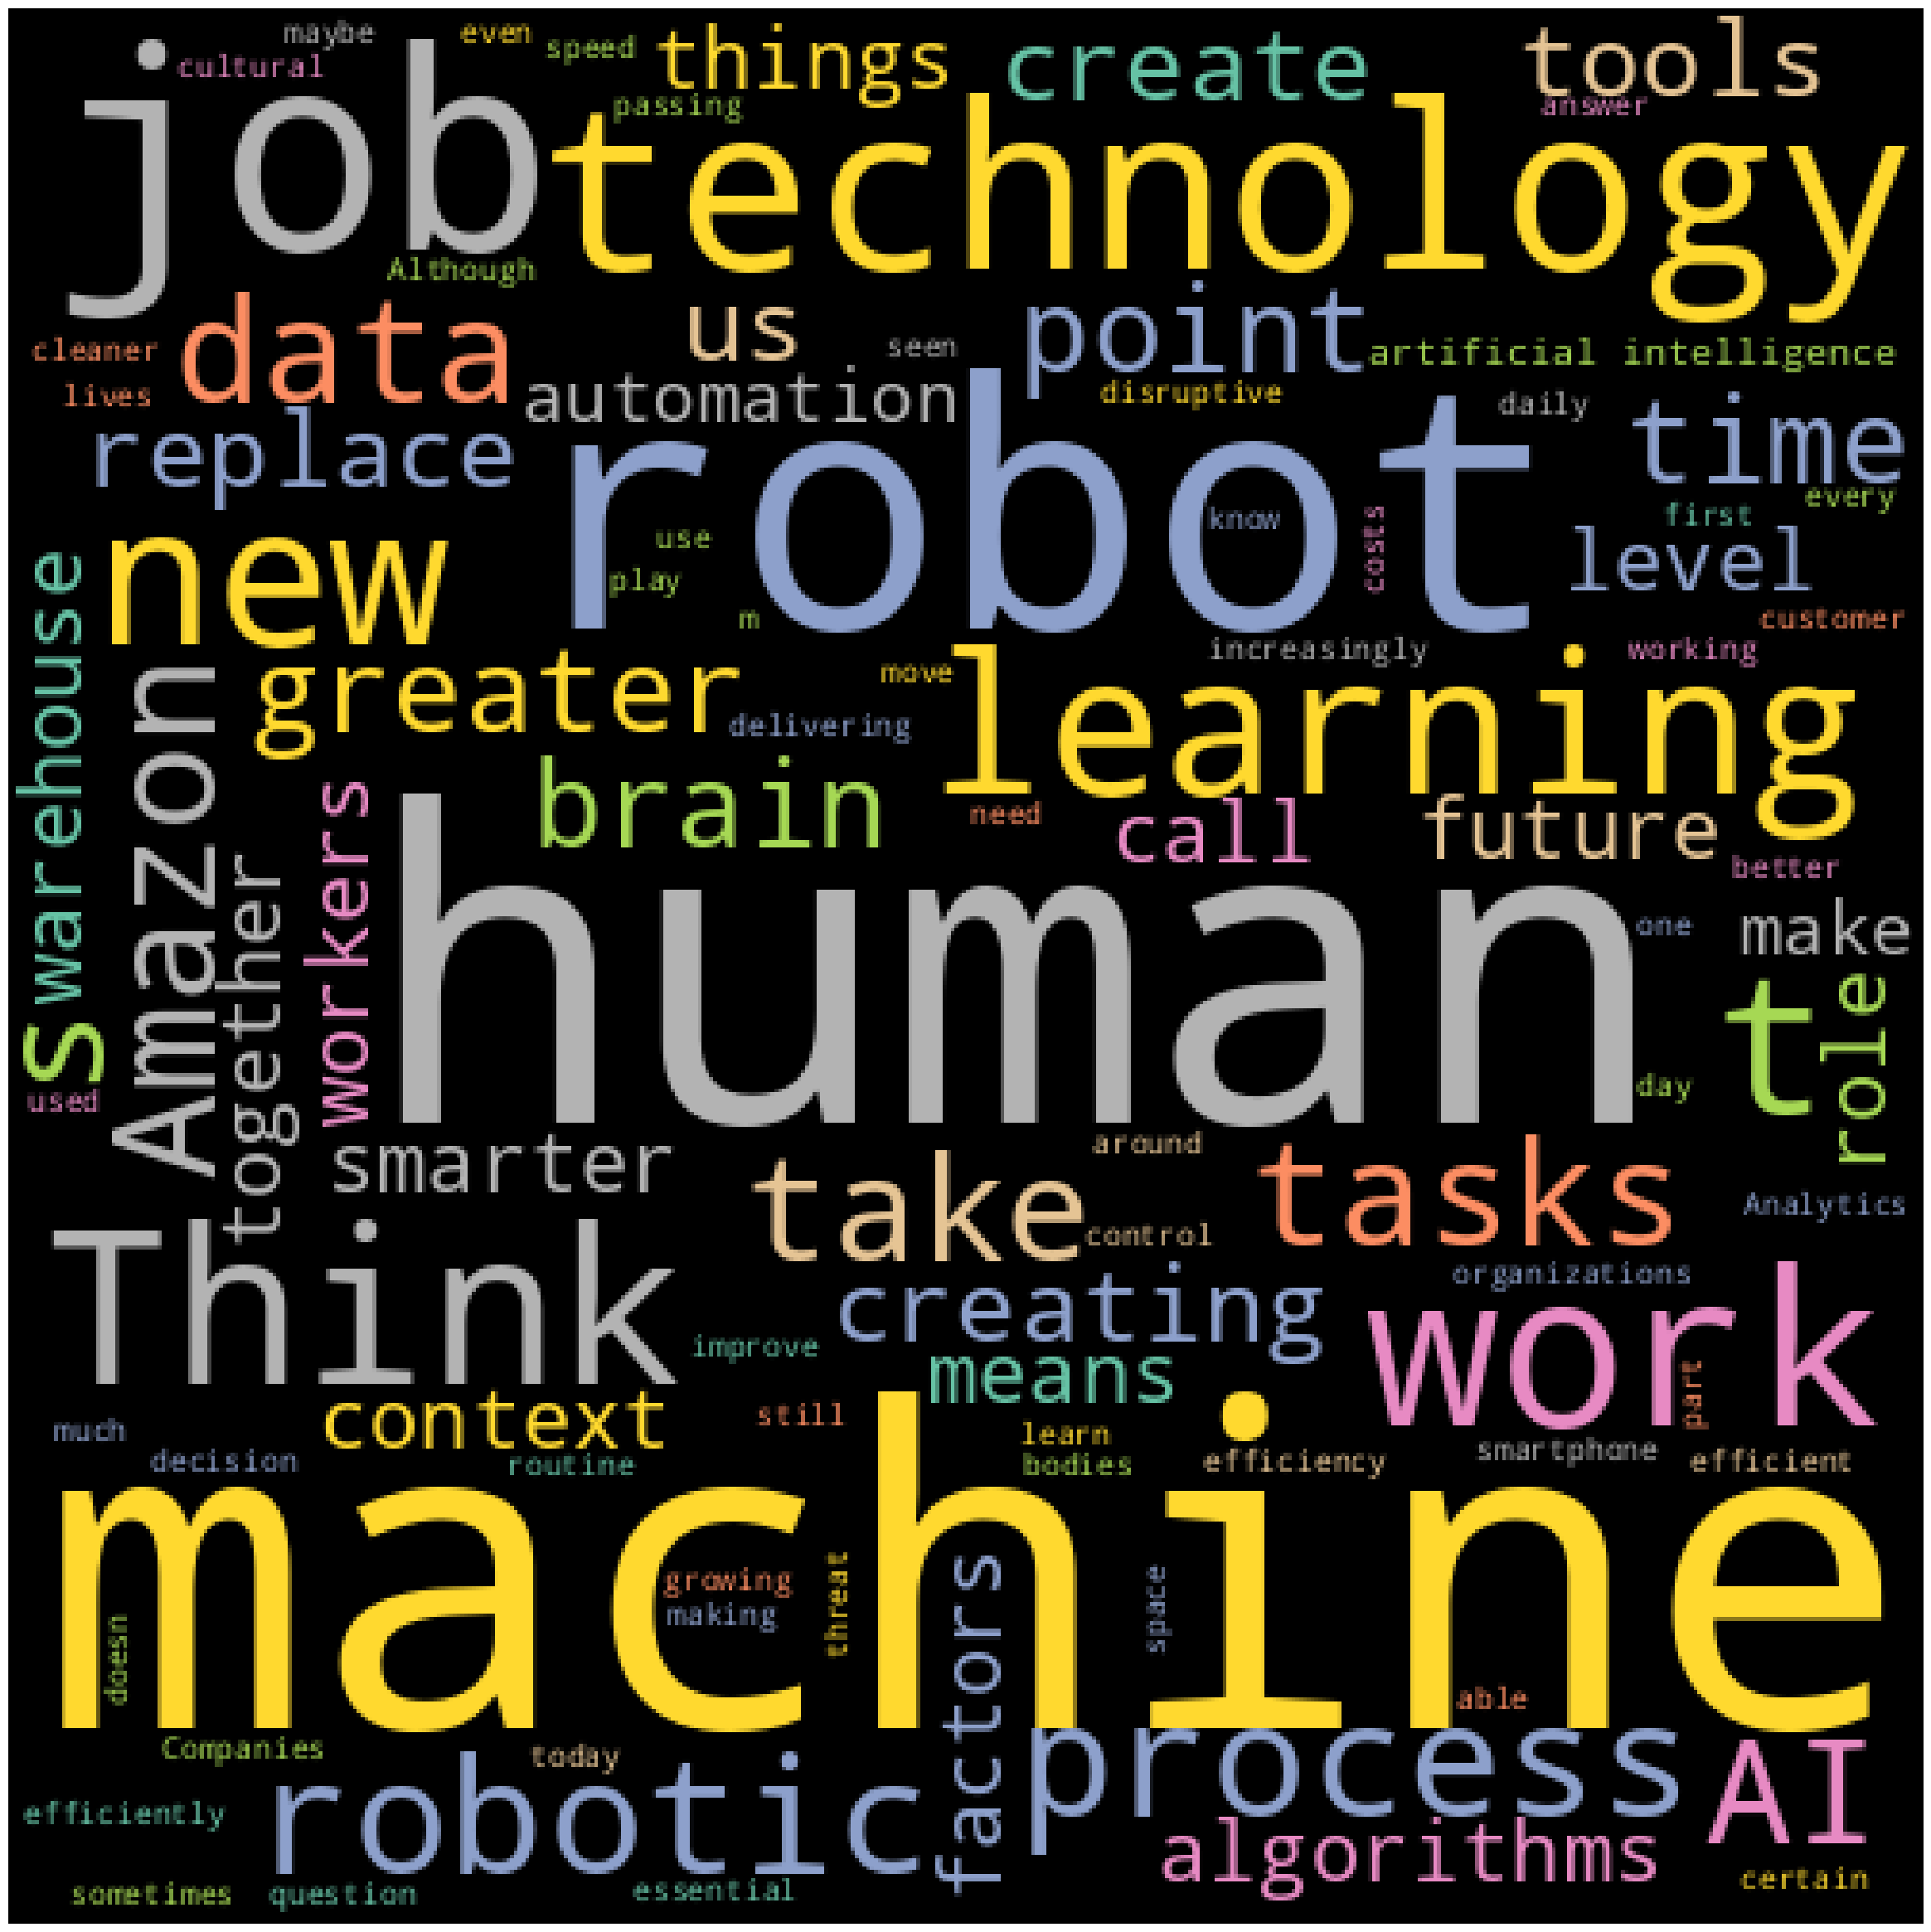

In [59]:
# Generate wordcloud
stopwords = STOPWORDS
stopwords.add('will')
wordcloud = WordCloud(width = 500, height = 500, background_color='black', max_words=100,colormap='Set2',stopwords=stopwords).generate(content)
# Plot
plot_cloud(wordcloud)

positive word cloud

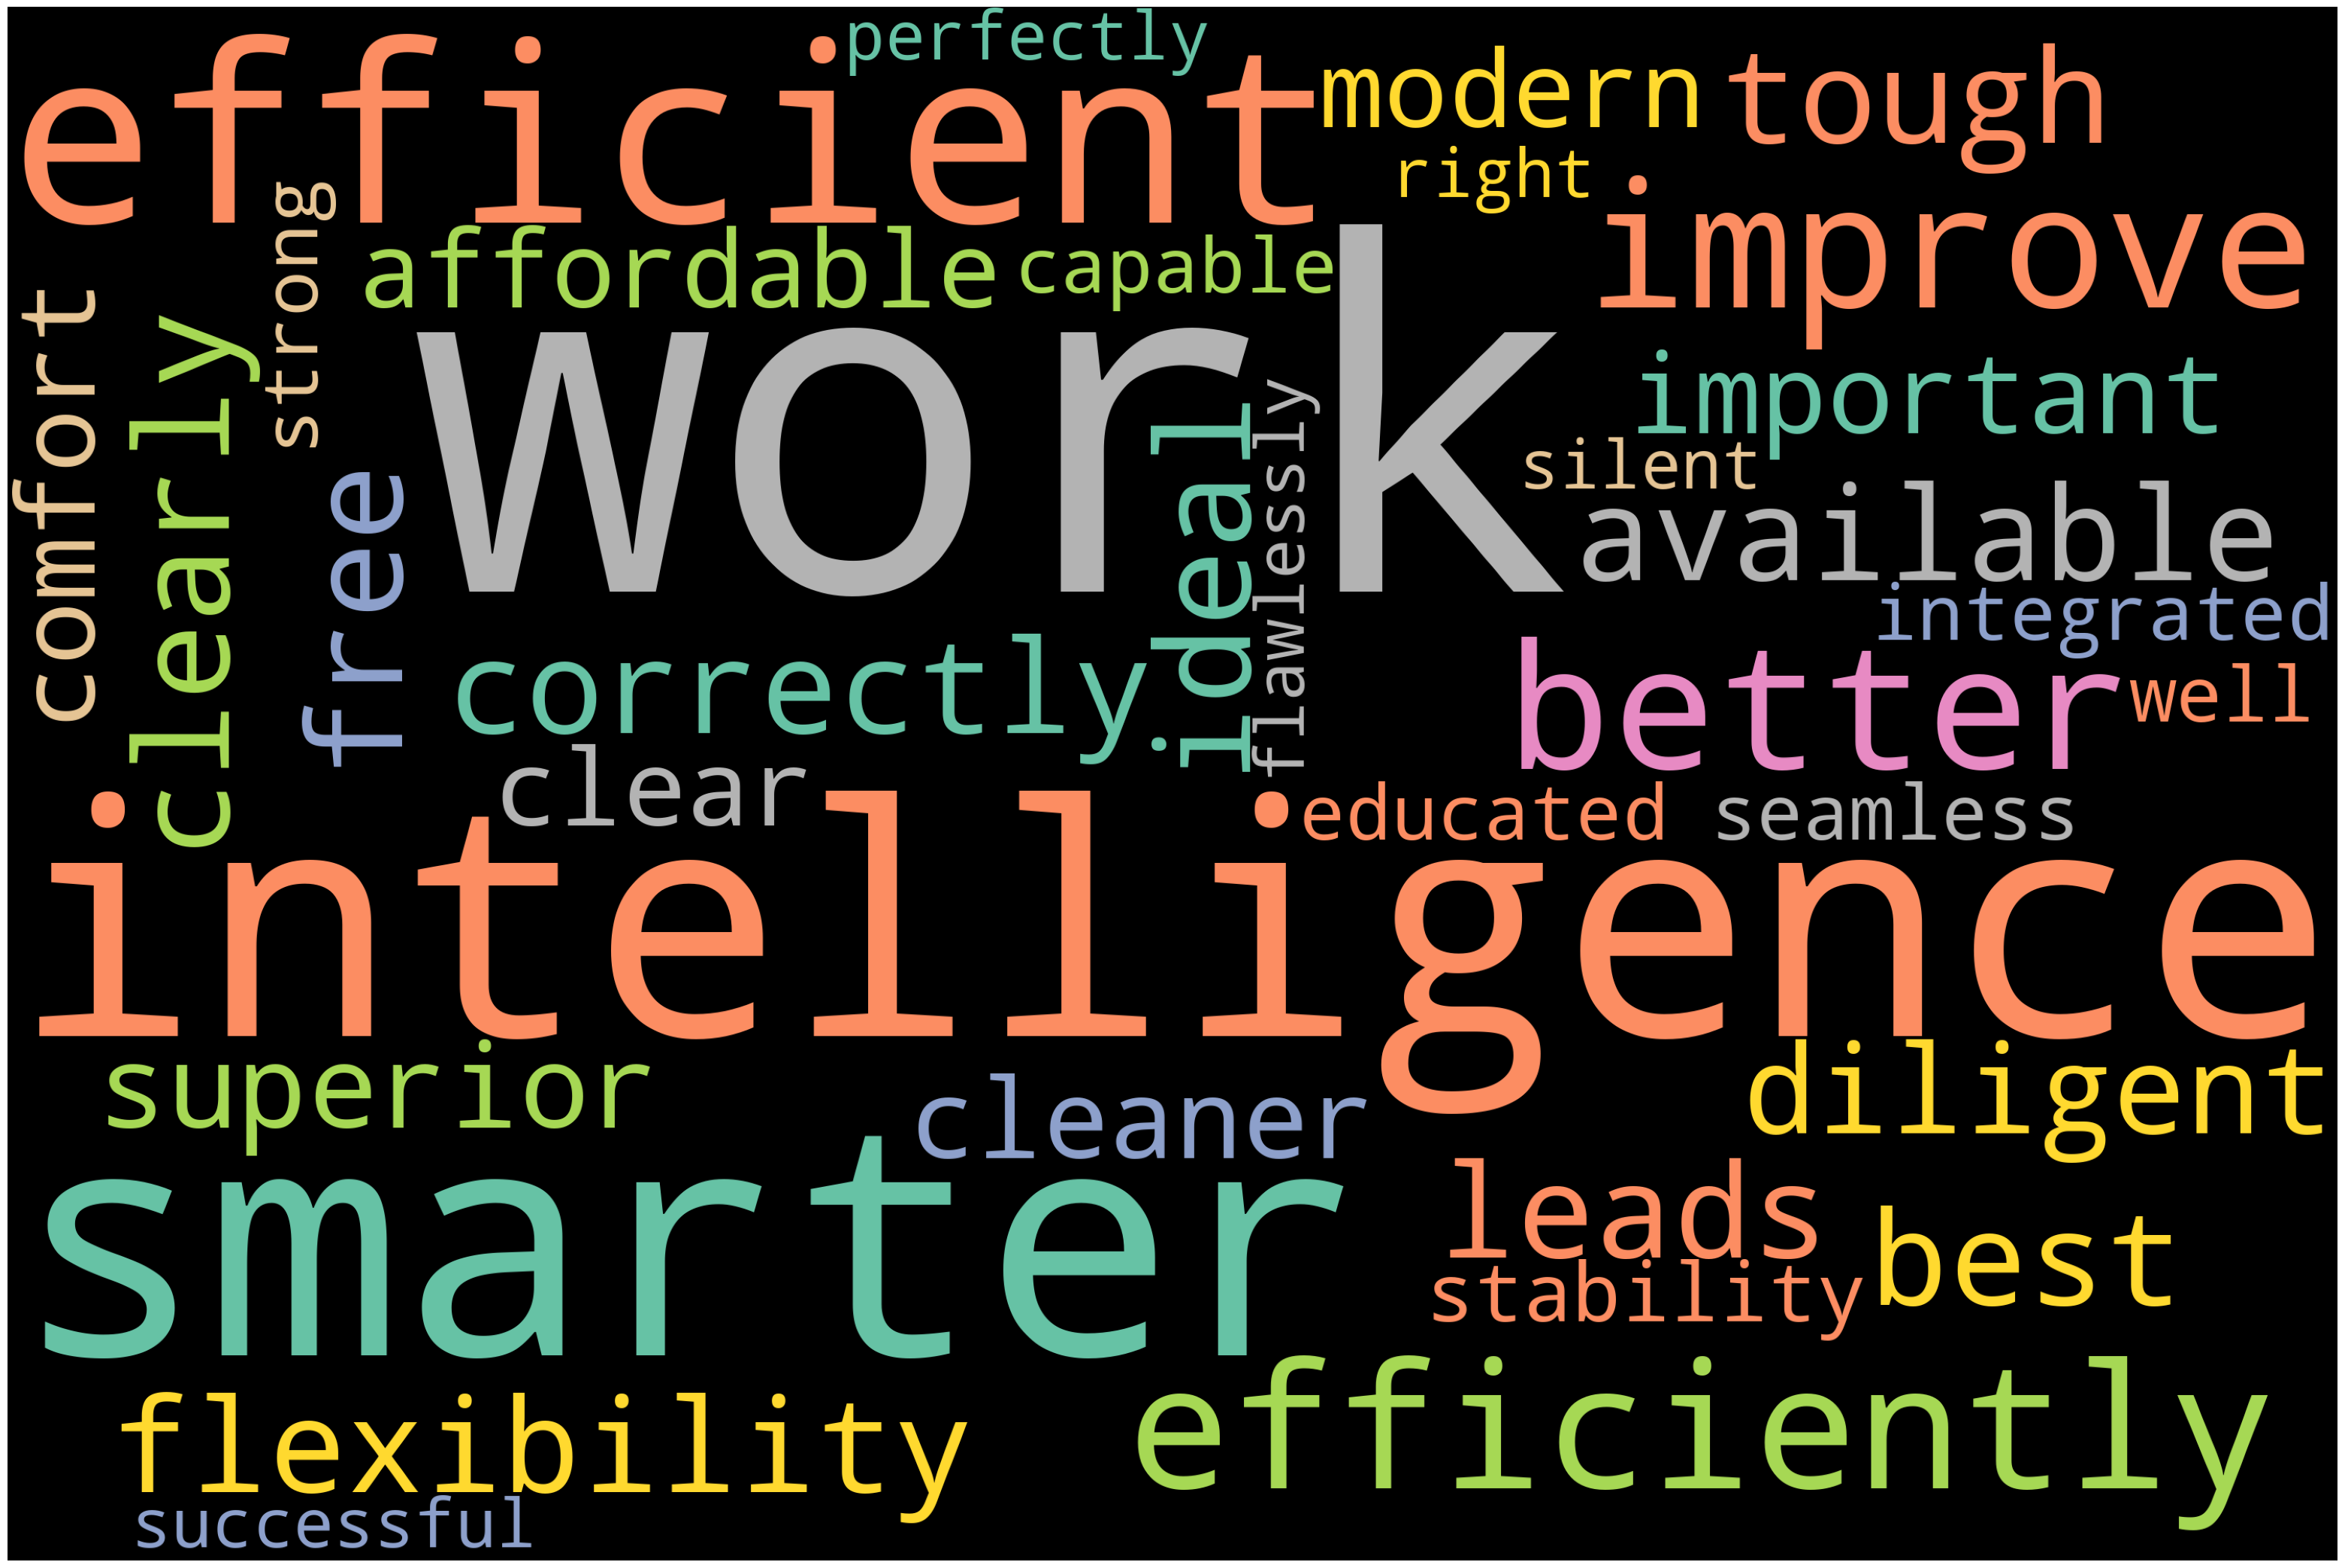

In [60]:
# Choosing the only words which are present in posword
pos_review = " ".join ([w for w in pos_count if w in poswords])
wordcloud = WordCloud(width = 3000, height = 2000, background_color='black', max_words=100,colormap='Set2',stopwords=stopwords).generate(pos_review)
#Plot
plot_cloud(wordcloud)

negative word cloud

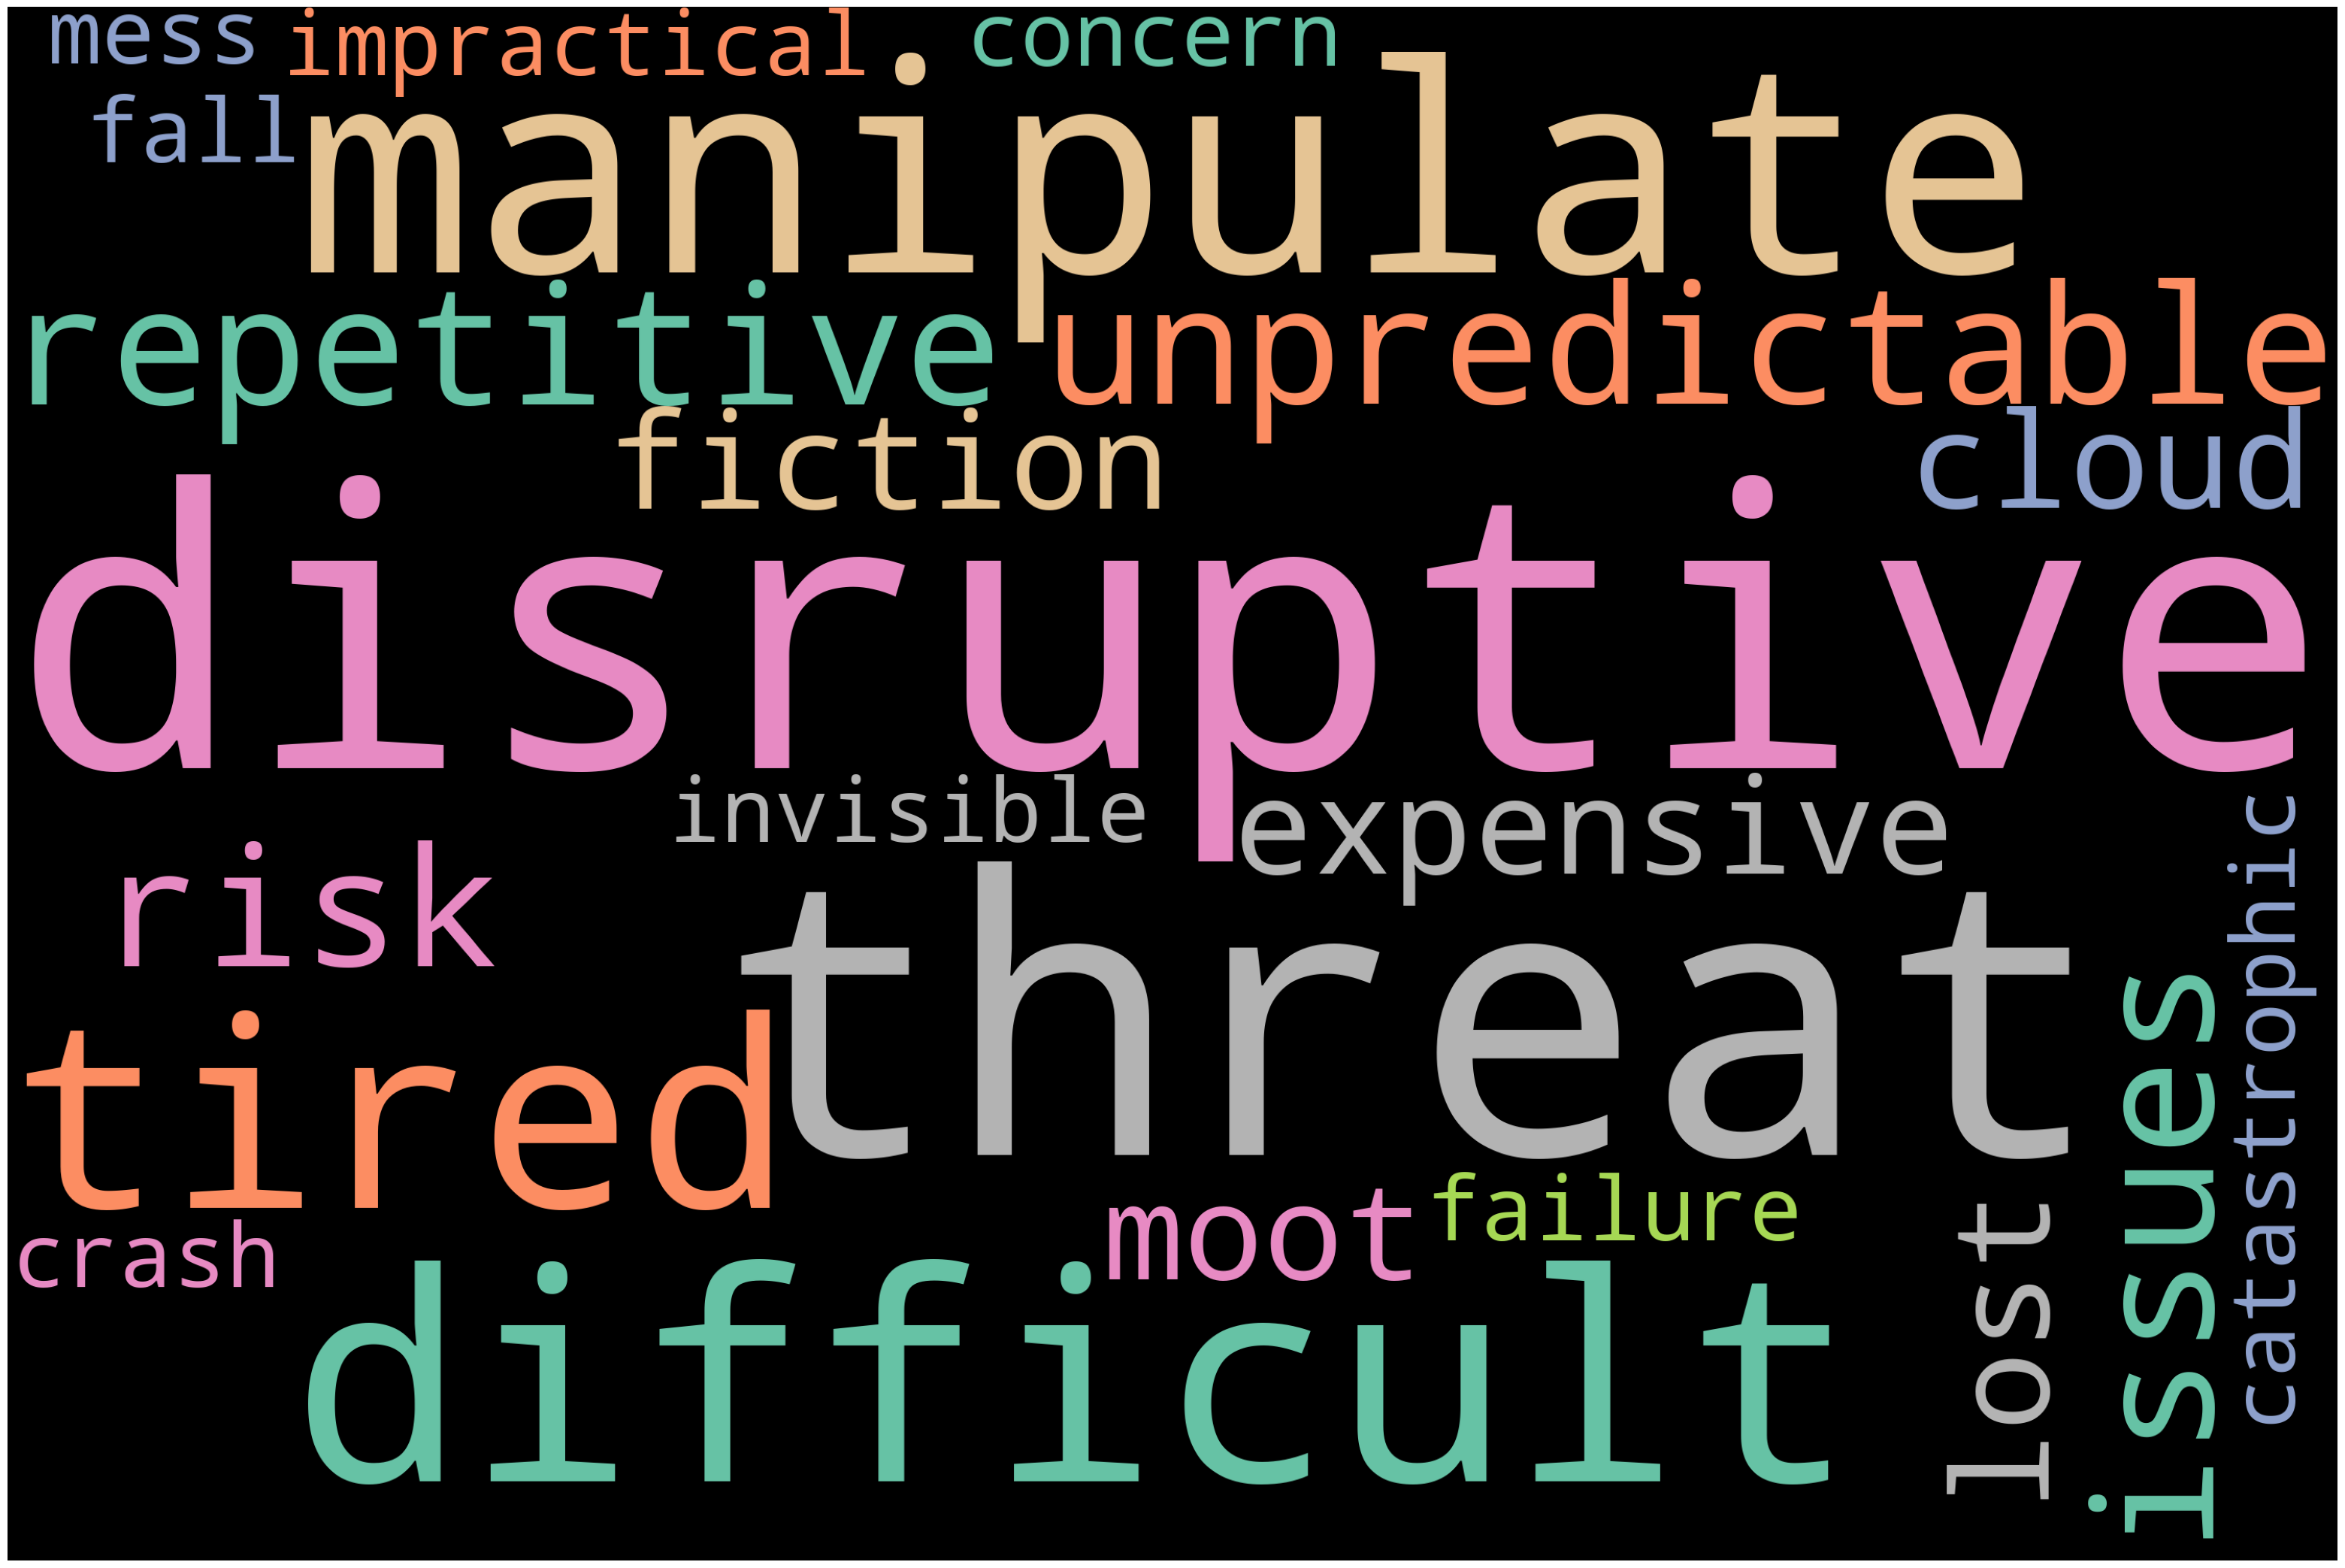

In [61]:
# Choosing the only words which are present in negwords
neg_review = " ".join ([w for w in neg_count if w in negwords])

wordcloud = WordCloud(width = 3000, height = 2000, background_color='black', max_words=100,colormap='Set2',stopwords=stopwords).generate(neg_review)
#Plot
plot_cloud(wordcloud)